<a href="https://colab.research.google.com/github/krishnaraddi/cars_eda/blob/main/cars_analysis_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm


In [ ]:
cars_df=pd.read_csv('/content/Cars93.csv')
cars_df.head()

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             59 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [ ]:
cars_df.isnull().sum()


,0
Id,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,34


<Axes: >

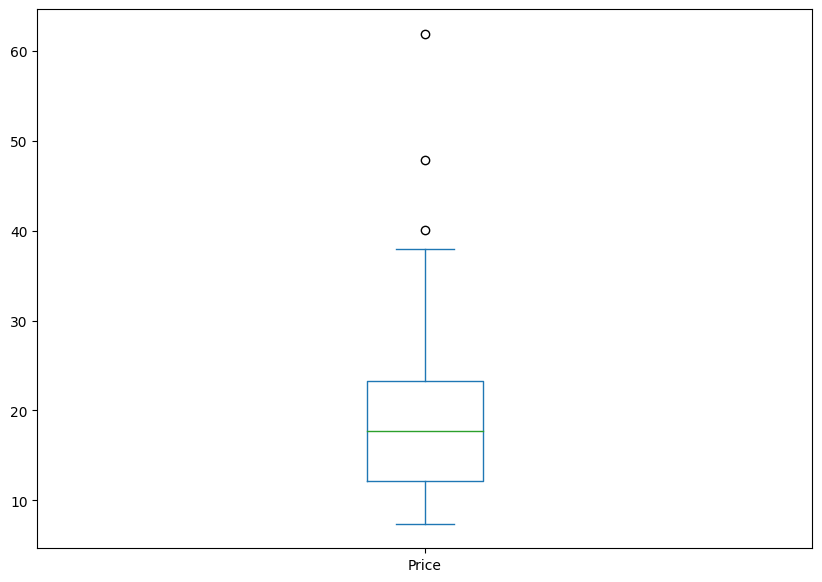

In [ ]:
cars_df["Price"].plot(kind="box",figsize = (10,7))

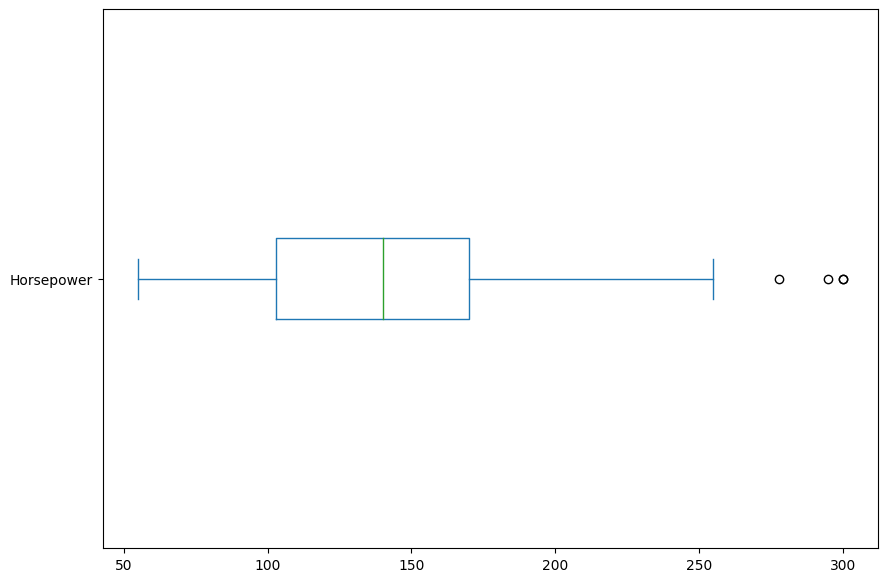

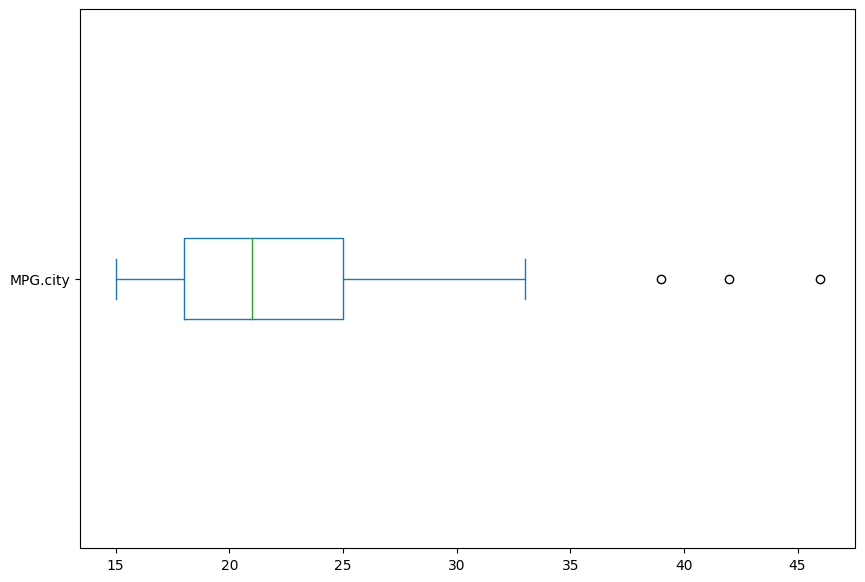

In [ ]:
cars_df["Horsepower"].plot(kind="box",figsize = (10,7), vert=False)
plt.show()
cars_df["MPG.city"].plot(kind="box",figsize = (10,7), vert=False)
plt.show()

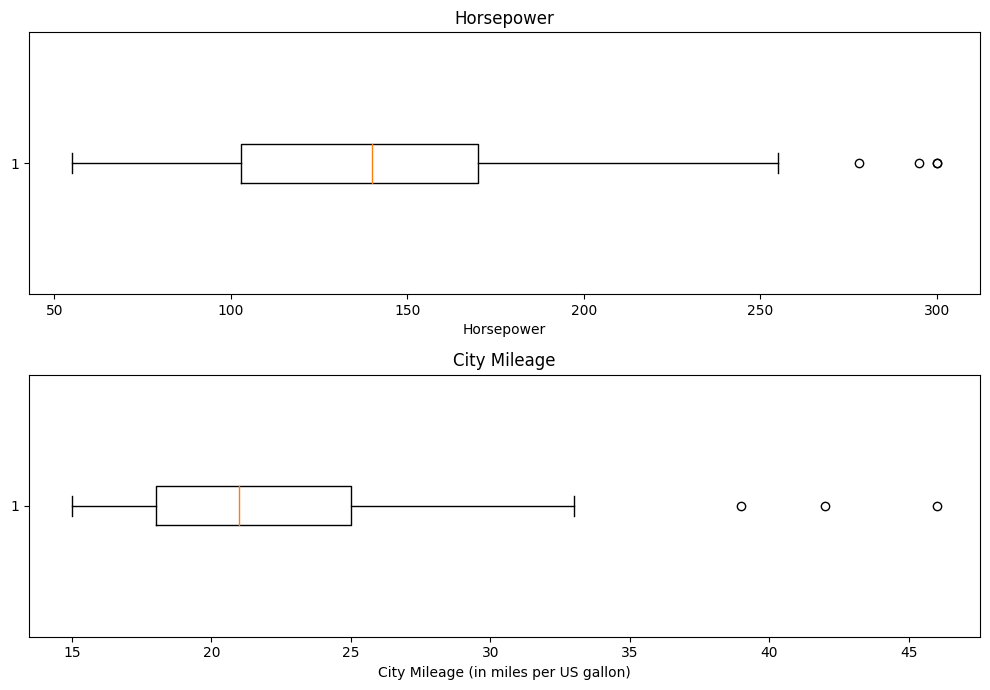

In [ ]:
#The following lines enable us to use subplot functionality
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figwidth(10)
fig.set_figheight(7)
#The following lines of code change the alignment from vertical to horizontal
ax1.boxplot(cars_df["Horsepower"],vert=False)
ax2.boxplot(cars_df["MPG.city"],vert=False)
#The following lines of code are used to add axis labels and titles to the graph
ax1.set_title('Horsepower')
ax1.set_xlabel('Horsepower')
ax2.set_title('City Mileage')
ax2.set_xlabel("City Mileage (in miles per US gallon)")
#In case of any superimposition of the subplots, the following functions caters the aesthetics
fig.tight_layout()


Text(0.5, 1, 'Prices of car according to car type')

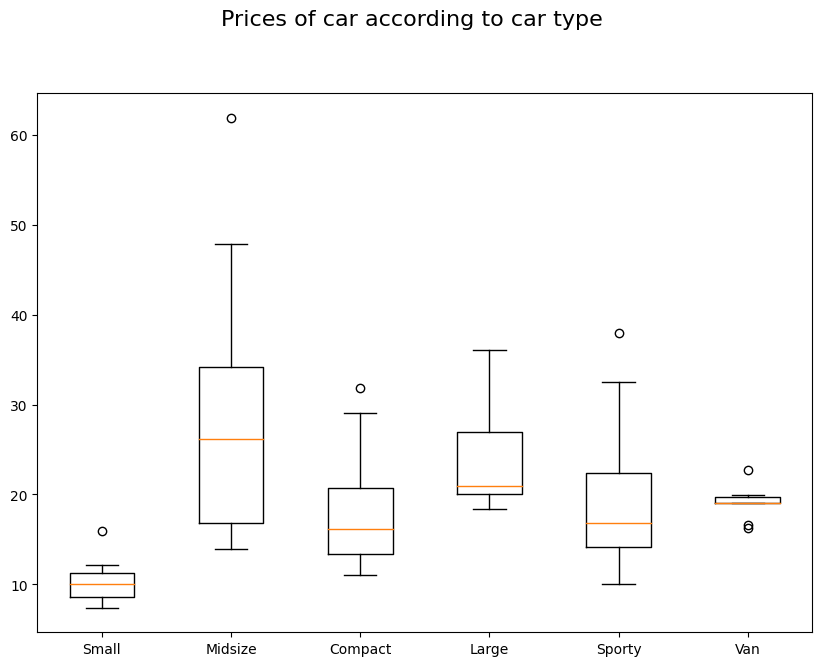

In [ ]:
#Finding the list of unique values of 'car type'
car_type_list = cars_df["Type"].unique()
#setting the width and height of the plot
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
#creating a box plot for every unique car type
ax.boxplot([cars_df["Price"][cars_df["Type"]==k] for k in car_type_list])
#To set the position for each plots in the iteration
plt.xticks([i for i in range(1,len(car_type_list)+1)],[k for k in car_type_list])
#super-title
fig.suptitle("Prices of car according to car type", fontsize=16, y = 1)


Text(0.5, 1, 'Prices of car according to car type')

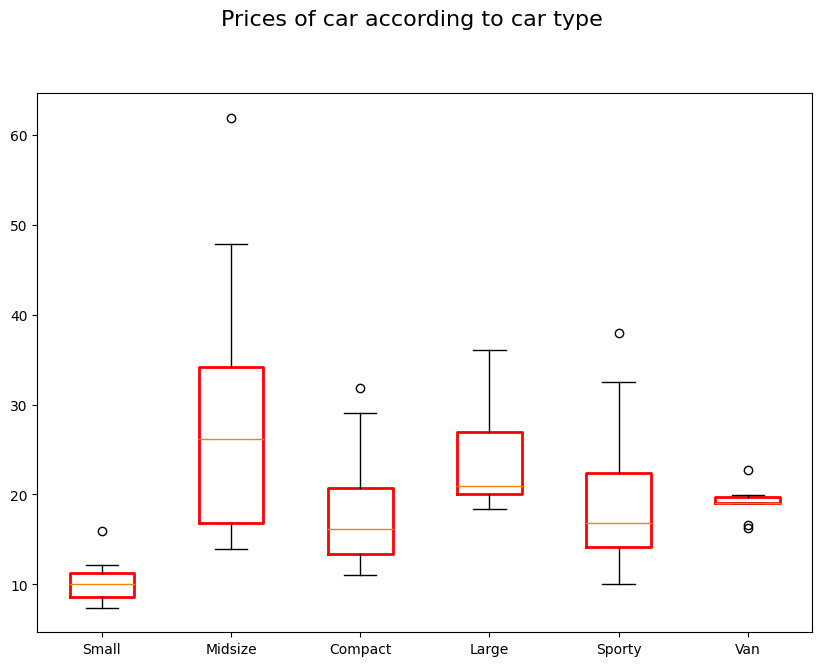

In [ ]:
#Finding the list of unique values of 'car type'
car_type_list = cars_df["Type"].unique()
#setting the width and height of the plot
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
#creating a box plot for every unique car type
bp = ax.boxplot([cars_df["Price"][cars_df["Type"]==k] for k in car_type_list])

for box in bp['boxes']:
    # change outline color
    box.set(color='red', linewidth=2)

#To set the position for each plots in the iteration
plt.xticks([i for i in range(1,len(car_type_list)+1)],[k for k in car_type_list])
#super-title
fig.suptitle("Prices of car according to car type", fontsize=16, y = 1)

Text(0.5, 1.0, 'Van')

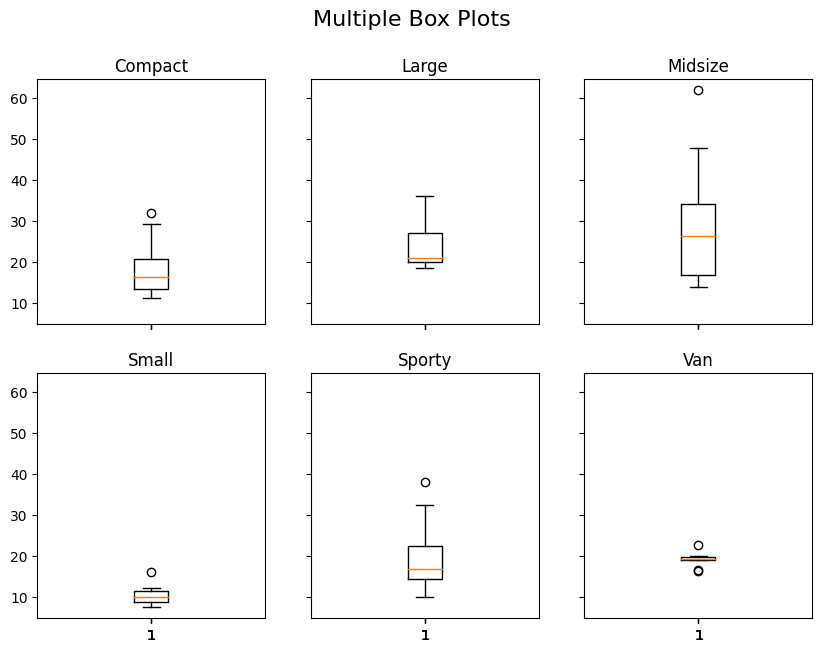

In [ ]:
#setting the plot, width and height
fig, ax = plt.subplots(2, 3, sharey=True, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(7)
#super-title
fig.suptitle("Multiple Box Plots", fontsize=16)
#accessing and creating the respective sub-plots
ax[0][0].boxplot(cars_df["Price"][cars_df["Type"]=="Compact"])
ax[0][0].set_title('Compact')
ax[0][1].boxplot(cars_df["Price"][cars_df["Type"]=="Large"])
ax[0][1].set_title('Large')
ax[0][2].boxplot(cars_df["Price"][cars_df["Type"]=="Midsize"])
ax[0][2].set_title('Midsize')
ax[1][0].boxplot(cars_df["Price"][cars_df["Type"]=="Small"])
ax[1][0].set_title('Small')
ax[1][1].boxplot(cars_df["Price"][cars_df["Type"]=="Sporty"])
ax[1][1].set_title('Sporty')
ax[1][2].boxplot(cars_df["Price"][cars_df["Type"]=="Van"])
ax[1][2].set_title('Van')


Text(0.5, 1.0, 'Horsepower vs MPG.city')

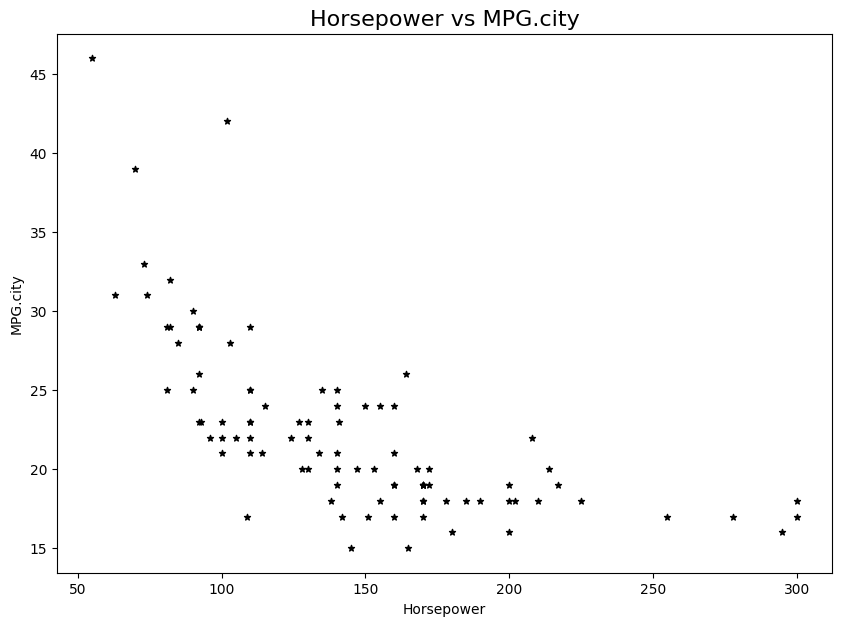

In [ ]:
#To Plot the data as a scatter plot
ax = cars_df.plot(["Horsepower"],["MPG.city"],kind="scatter", color = "black",marker = "*",figsize=(10,7))
#To add labels and title to the output
ax.set_xlabel("Horsepower")	#sets label for x-axis
ax.set_ylabel("MPG.city")	#sets label for y-axis
ax.set_title("Horsepower vs MPG.city",fontsize=16)	#sets title for the graph


<Axes: xlabel='Horsepower'>

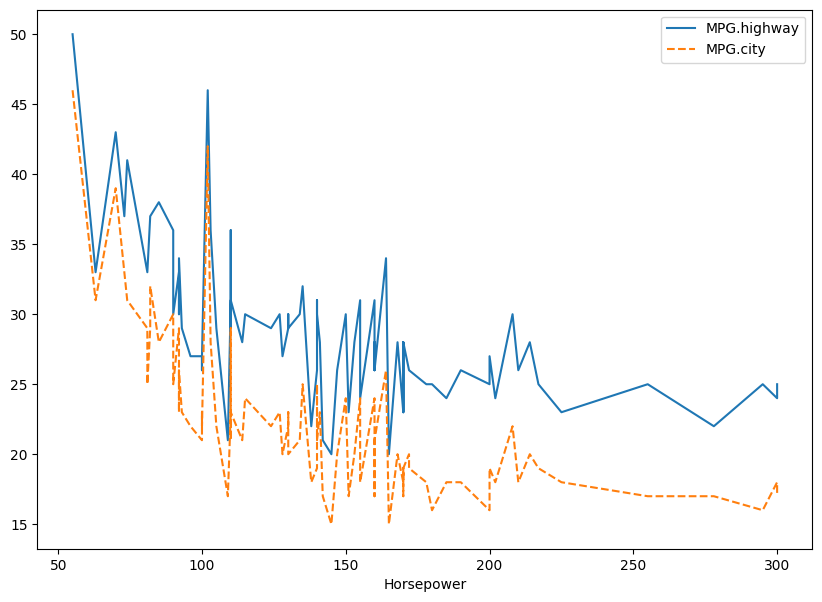

In [ ]:
#First sort the data to get a proper line chart
cars_df=cars_df.sort_values(by="Horsepower")
#The following lines of code create a blank canvas to plot on
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
#Data is fed and plotted using the following lines
cars_df.plot(ax = ax, x = "Horsepower", y = "MPG.highway", kind = "line", )
cars_df.plot(ax = ax, x = "Horsepower",y= "MPG.city", kind = "line", linestyle='--')


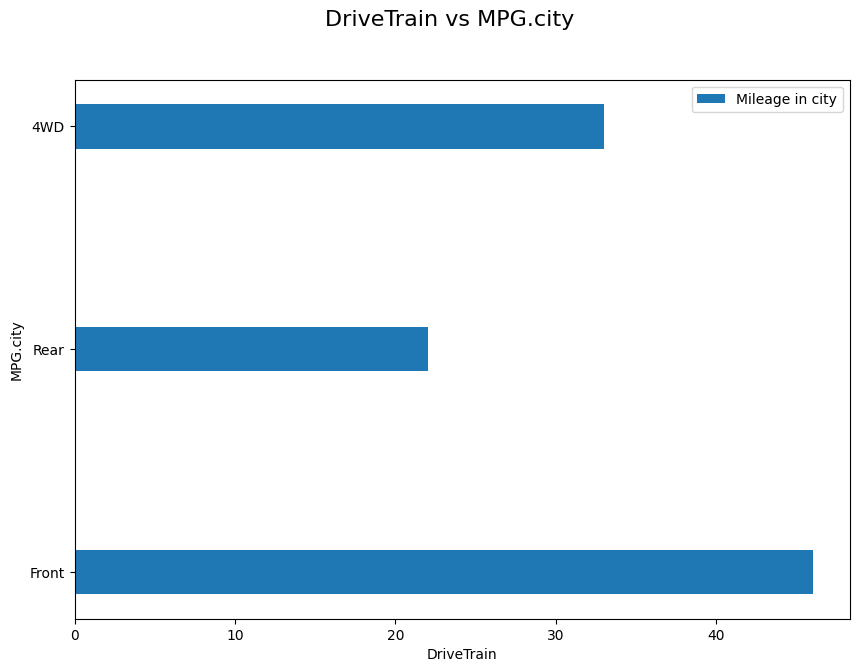

In [ ]:
#width,height
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
#code to create bar chart
plt.barh(cars_df["DriveTrain"], cars_df["MPG.city"],height=0.2,label="Mileage in city")
#title and label
plt.suptitle("DriveTrain vs MPG.city",fontsize=16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
#legend
plt.legend()


In [ ]:
#Use the following code snippet to filter the unique values of no. of passengers a car can carry
cars_df["Passengers"].unique()



array([5, 6, 4, 7, 8, 2])

In [ ]:
#Use the following code snippet to filter the unique values of Types of car.
cars_df["Type"].unique()


array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [ ]:
#Use the following code snippet to filter the data and obtain the target columns into a separate dataframe.
grouped_data = cars_df[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack().reset_index()
grouped_data

Type,Passengers,Compact,Large,Midsize,Small,Sporty,Van
0,2,NaN,NaN,NaN,NaN,2.0,NaN
1,4,1.0,NaN,2.0,8.0,12.0,NaN
2,5,13.0,NaN,15.0,13.0,NaN,NaN
3,6,2.0,11.0,5.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,8.0
5,8,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='Passengers'>

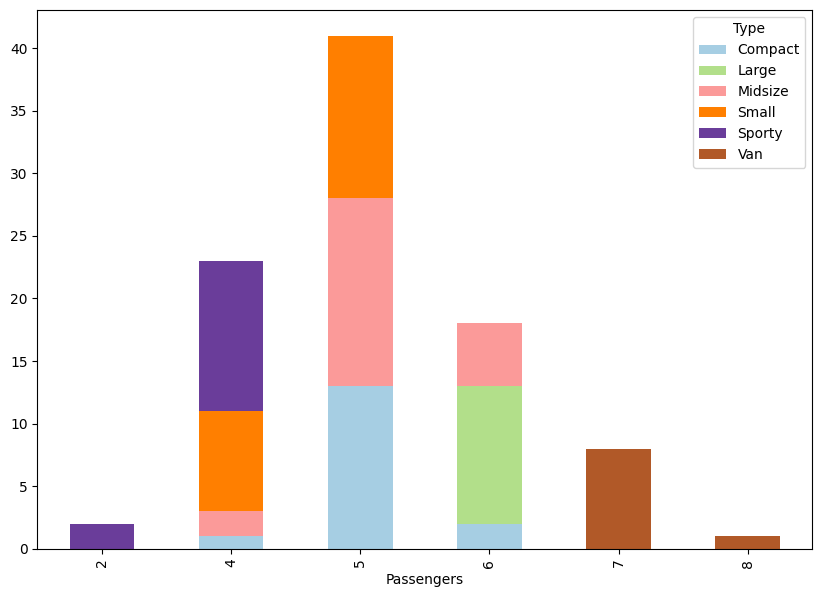

In [ ]:
#Stacked Bar Graph can be plotted using the grouped data, as follows:
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.Paired,figsize=(10,7))


<Axes: xlabel='Passengers'>

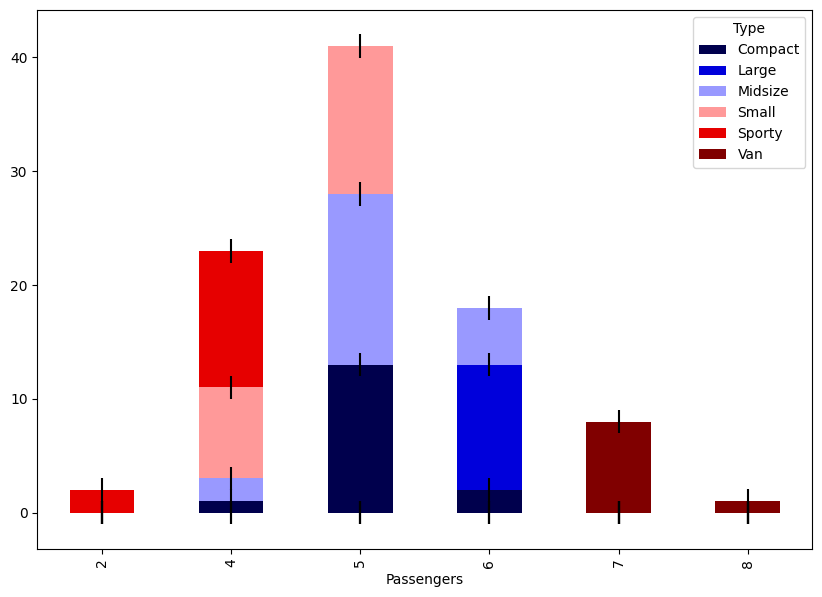

In [ ]:
#Error bars can be added to the stacked bar graph with the 'yerr' argument as follows
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.seismic,figsize=(10,7),yerr=np.std(cars_df["Passengers"]))


In [ ]:
grouped_cars = cars_df[["MPG.city","MPG.highway","RPM","DriveTrain"]].groupby(by="DriveTrain").mean().T
grouped_cars


DriveTrain,4WD,Front,Rear
MPG.city,20.5,23.522388,18.6875
MPG.highway,25.8,30.238806,26.3125
RPM,5120.0,5374.626866,4987.5000


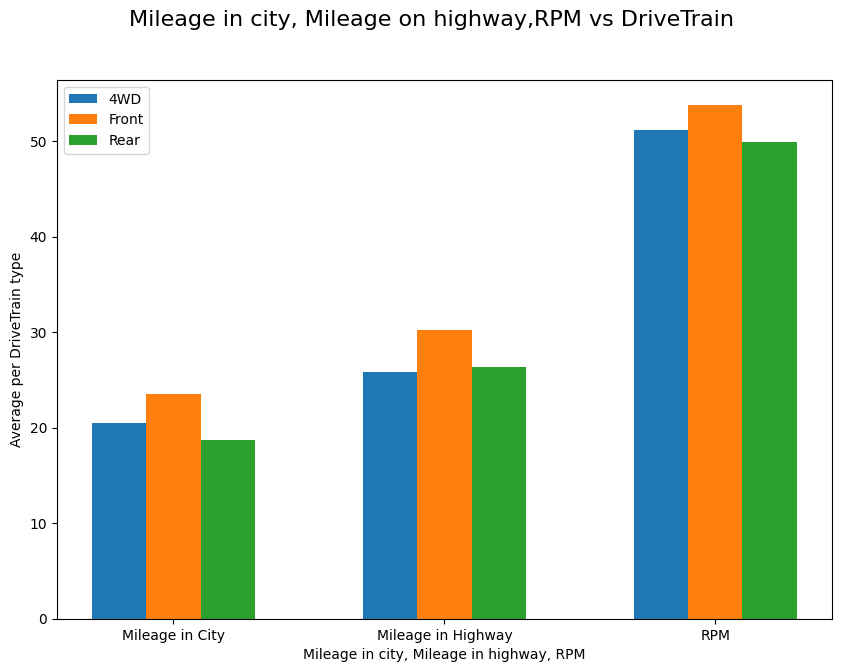

In [ ]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
grouped_cars.loc['RPM'] /= 100
width=0.2	# We assign the value of the width of the bar and on the number of groups.
ind=list(range(len(cars_df['DriveTrain'].unique())))
plt.bar([i for i in ind], height=grouped_cars["4WD"], label="4WD", width=width)
plt.bar([i+width for i in ind], height=grouped_cars["Front"], width=width, bottom=0, label="Front")
plt.bar([i+width*2 for i in ind], height=grouped_cars["Rear"], label="Rear", width=width, bottom=0)
plt.suptitle("Mileage in city, Mileage on highway,RPM vs DriveTrain", fontsize=16)
plt.xlabel("Mileage in city, Mileage in highway, RPM")
plt.ylabel("Average per DriveTrain type")
plt.xticks([i+width for i in ind],["Mileage in City","Mileage in Highway","RPM"])
plt.legend()


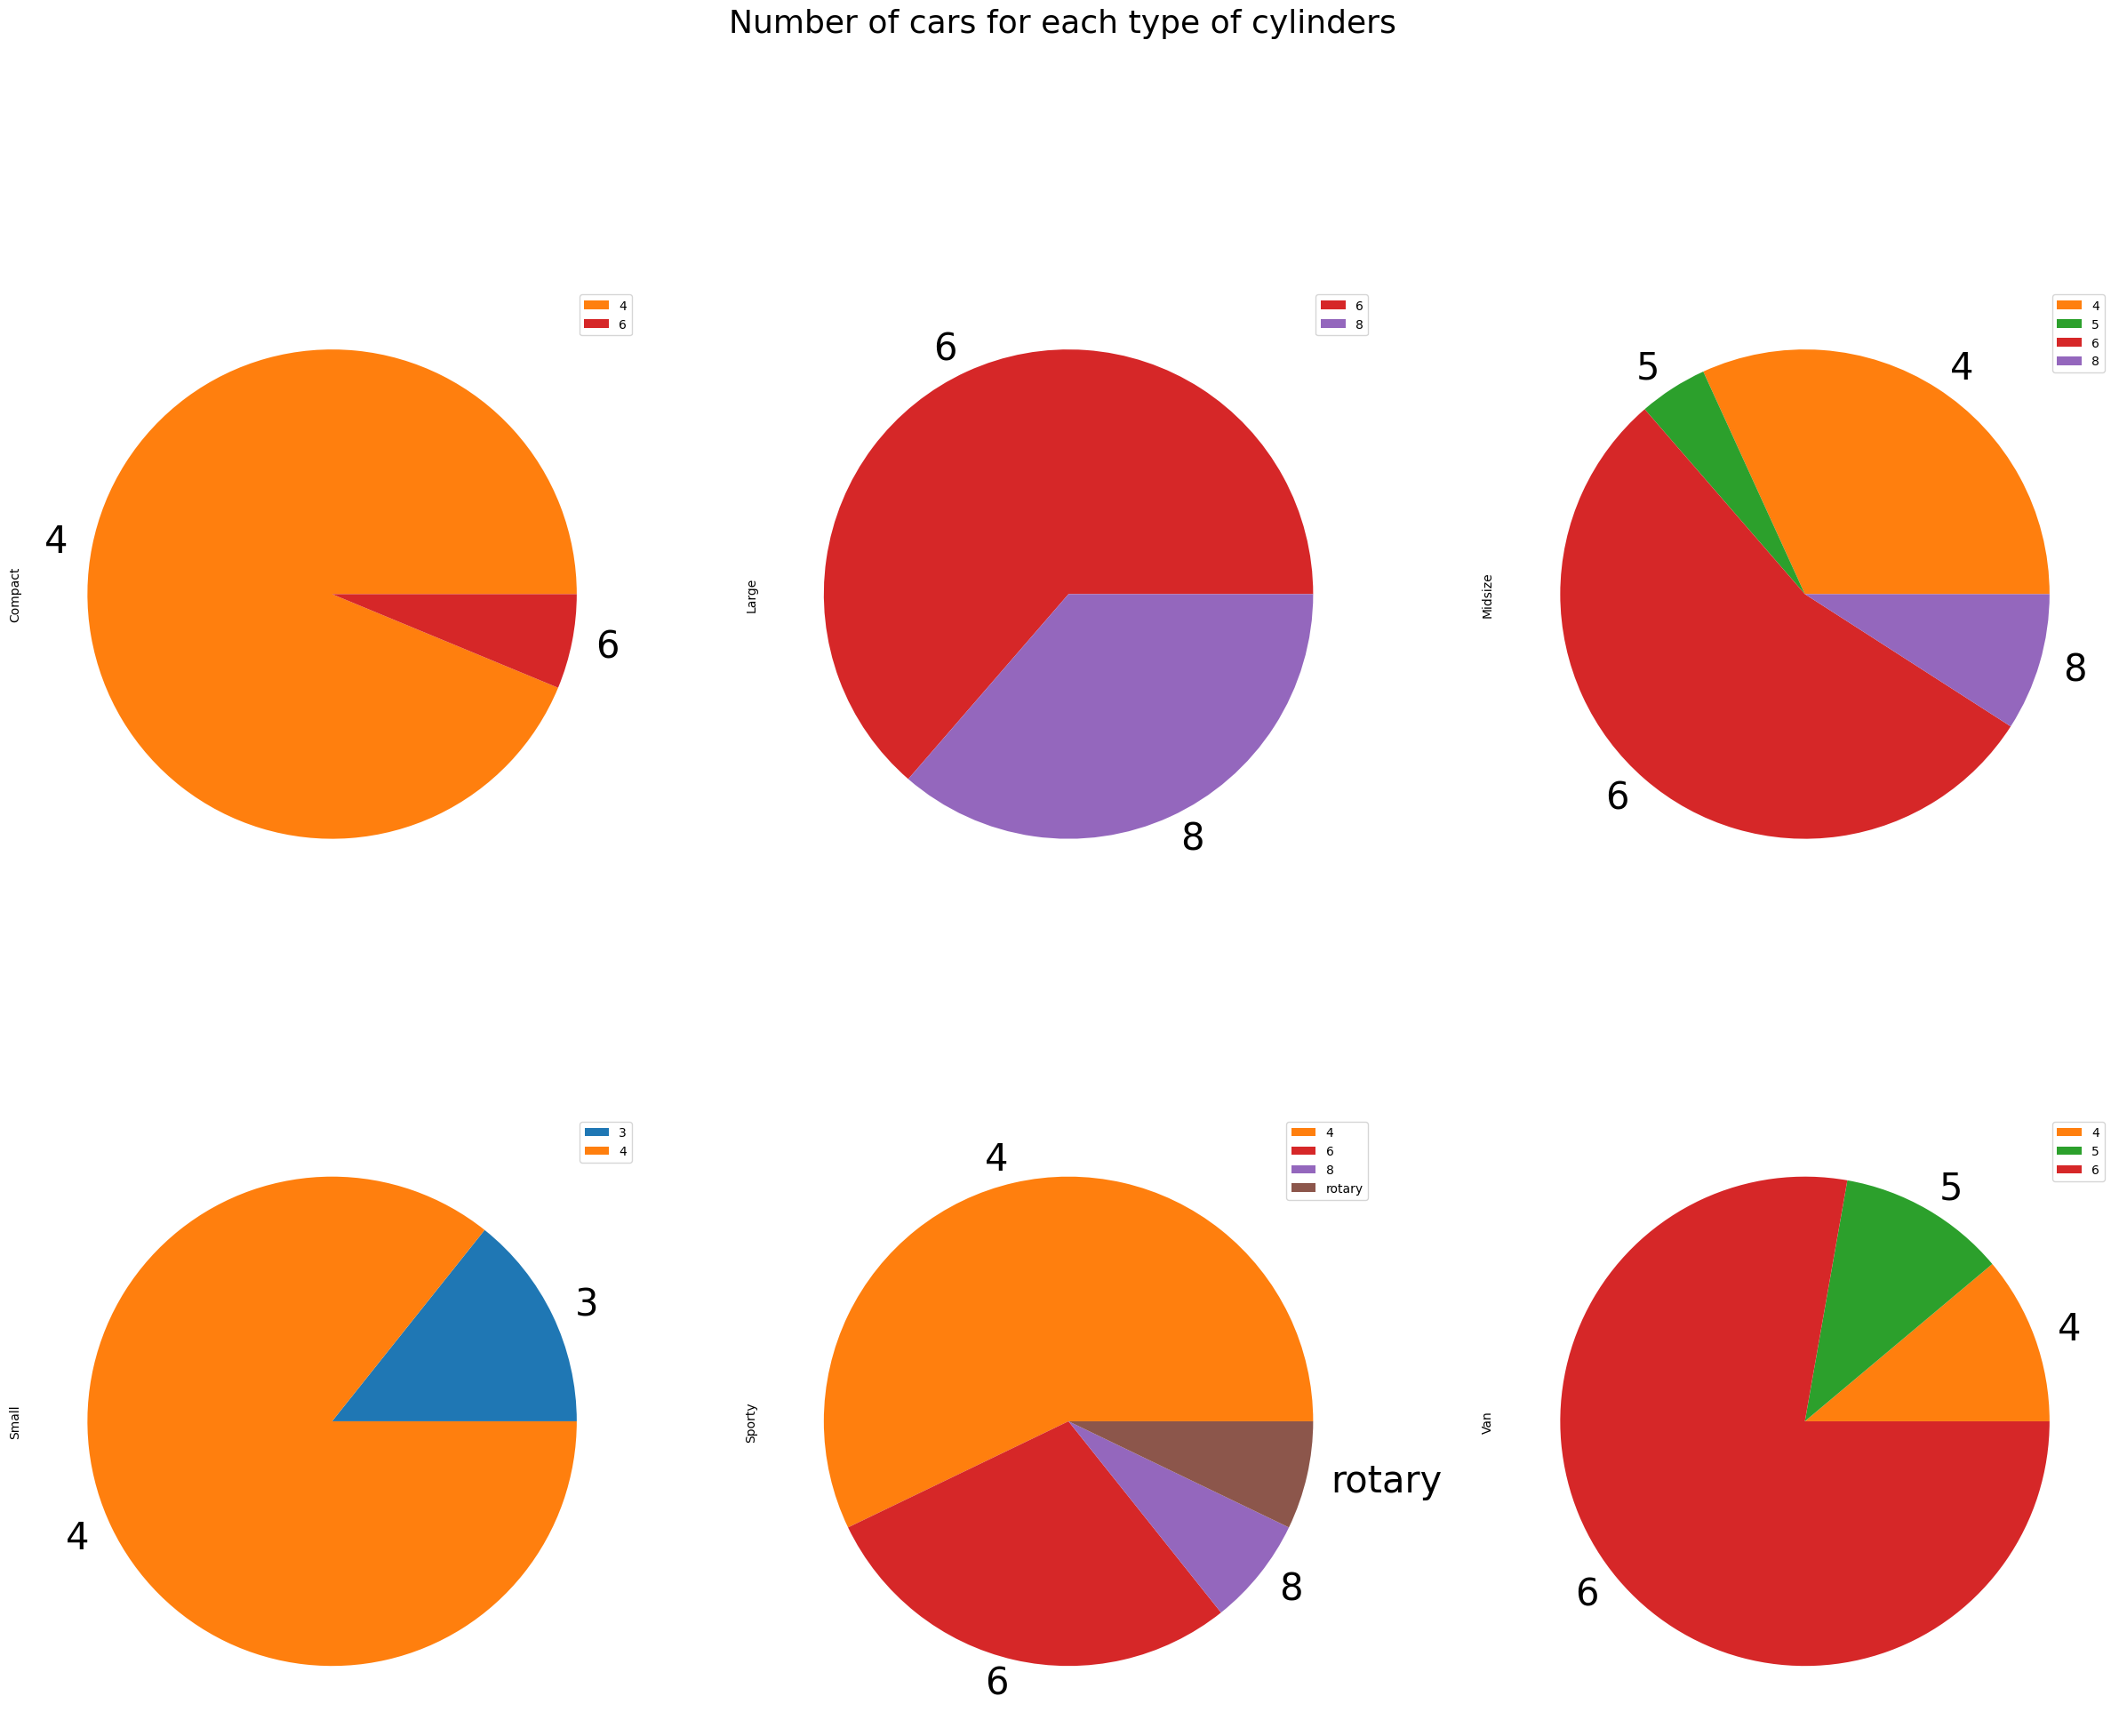

In [ ]:
grouped_data = cars_df[["Cylinders", "Type"]].groupby(by = ["Cylinders", "Type"]).size().unstack()
fig, ax = plt.subplots(2,3, figsize = (12,10))
grouped_data.plot.pie(ax = ax, subplots = True, fontsize = 30)
fig.suptitle("Number of cars for each type of cylinders", fontsize=26, x = 1, y = 2.1)
fig.tight_layout(rect=[0,0,2,2])


**Assume, there is a need to plot the range of mileage under which most cars fall.  For graphical representation, let us plot a histogram using the code given below:**



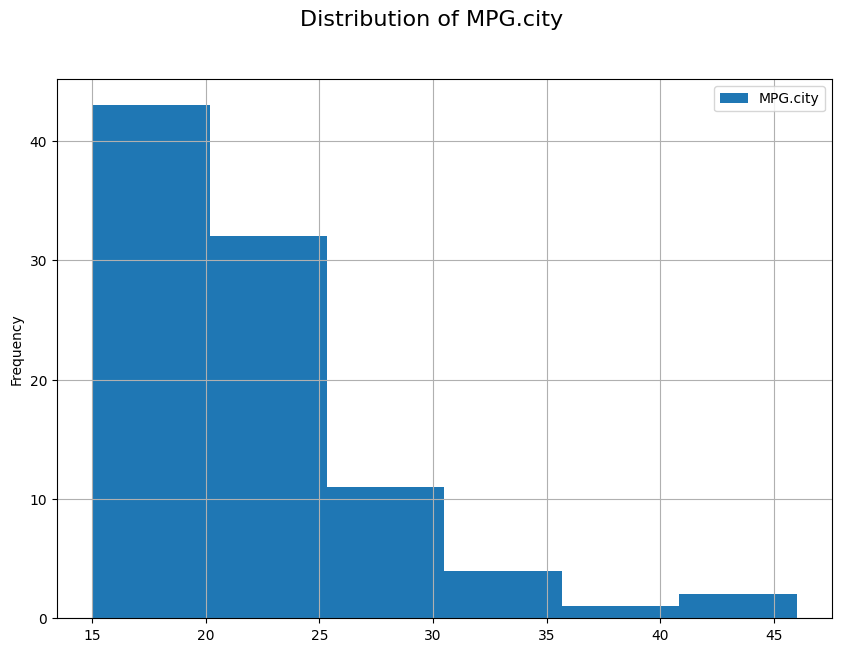

In [ ]:
cars_df["MPG.city"].plot(kind="hist", grid=True, figsize=(10,7), bins=6)
plt.suptitle("Distribution of MPG.city", fontsize=16)
plt.legend()


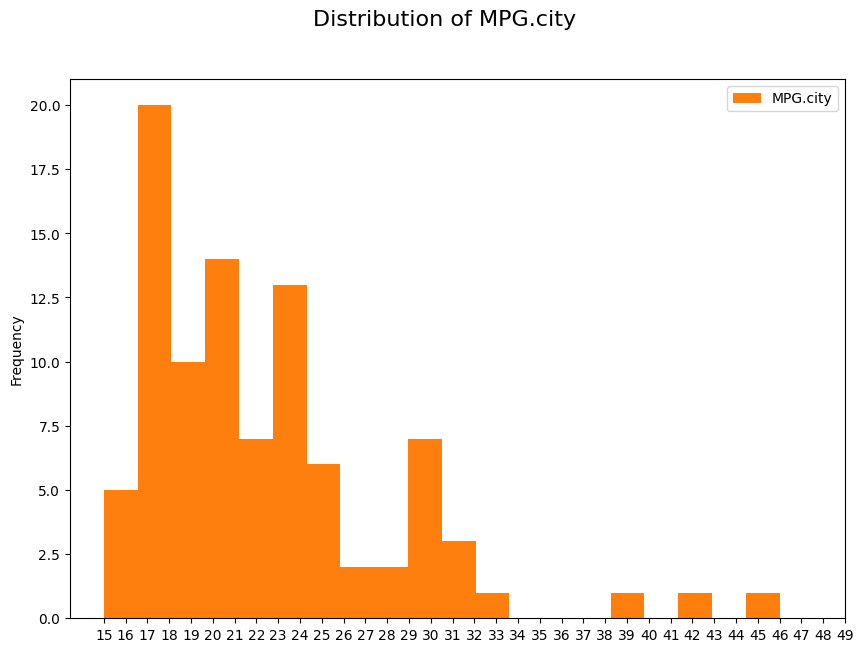

In [ ]:
cars_df["MPG.city"].plot(kind="hist", bins=20, figsize=(10,7),color="C1")
plt.suptitle("Distribution of MPG.city", fontsize=16)
plt.xticks(range(15,50))
plt.legend()


(14.0, 50.0)

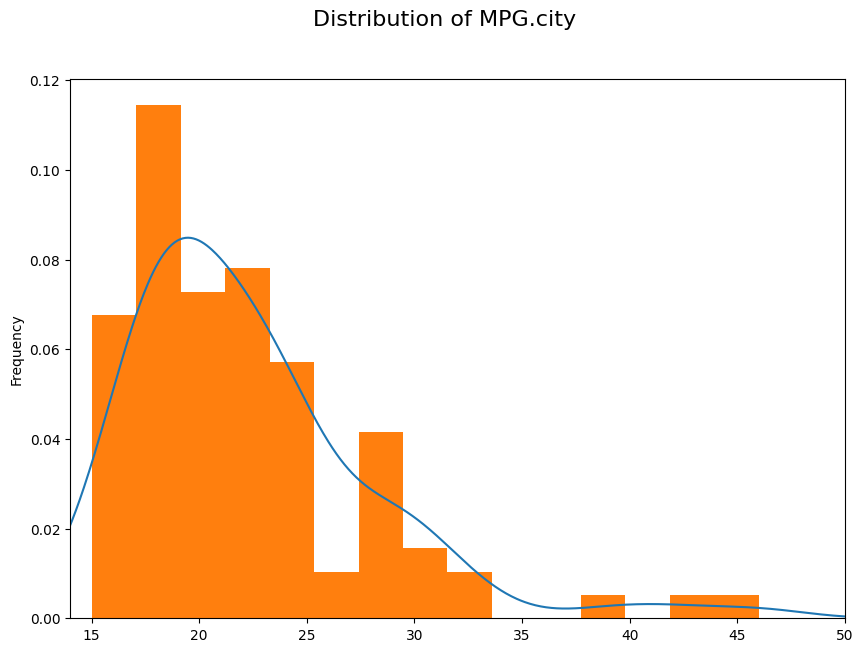

In [ ]:
cars_df["MPG.city"].plot(kind="density")
cars_df["MPG.city"].plot(kind="hist",bins=15,density=True, figsize=(10,7))
plt.suptitle("Distribution of MPG.city",fontsize=16)
plt.xlim(14,50)
